In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def plot_training_loss(data, epoch_batches, title, type="Training", tick_interval=100, baseline=None, average=False):
    colors = sns.color_palette("husl", 2)
    sns.set(style="darkgrid")
    plt.figure(figsize=(12, 6))

    no_samples = len(data)
    average_samples = no_samples // 4

    xs = [d[0] for d in data]
    data_points = [d[1] for d in data]

    plt.plot(xs, data_points, color=colors[0], label=f"{type} {title}")

    window_size = 25
    padded_data = np.pad(data_points, (window_size // 2, window_size - 1 - window_size // 2), mode='edge')
    moving_average = np.convolve(padded_data, np.ones(window_size) / window_size, mode='valid')
    x_range = np.linspace(xs[0], xs[-1], len(moving_average))
    plt.plot(x_range, moving_average, color=colors[1], label='Moving Average')

    plt.title(f"{type} {title} per Batch")
    plt.xlabel('Batch Number')
    plt.ylabel('Score')
    plt.tick_params(axis='both', which='major', labelsize=12)

    if baseline is not None:
        plt.axhline(y=baseline, color='r', linestyle='--', label=f'Blank Baseline ({baseline})')
    if average:
        avg = round(sum(data_points[-average_samples:]) / len(data_points[-average_samples:]), 4)
        plt.axhline(y=avg, color='b', linestyle='--', label=f'Average {title} ({avg})')

    for epoch in epoch_batches:
        plt.axvline(x=epoch, linestyle='dotted', color='black')

    plt.legend()
    plt.tight_layout(pad=3)
    plt.show()


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_val_loss(data, epoch_batches, title, tick_interval=10):
    colors = sns.color_palette("husl", len(data))
    sns.set(style="darkgrid")
    plt.figure(figsize=(12, 6))

    xs = [d[0] for d in list(data.values())[0]]

    for i, (label, d) in enumerate(data.items()):
        plt.plot(xs, [data[1] for data in d], color=colors[i], label=f"{label}")

    for epoch in epoch_batches:
        plt.axvline(x=epoch, linestyle='dotted', color='black')

    plt.title(f'Validation {title} per Batch')
    plt.xlabel('Batch Number')
    plt.ylabel('Score')
    plt.tick_params(axis='both', which='major', labelsize=12)

    plt.legend()
    plt.tight_layout(pad=3)
    plt.show()


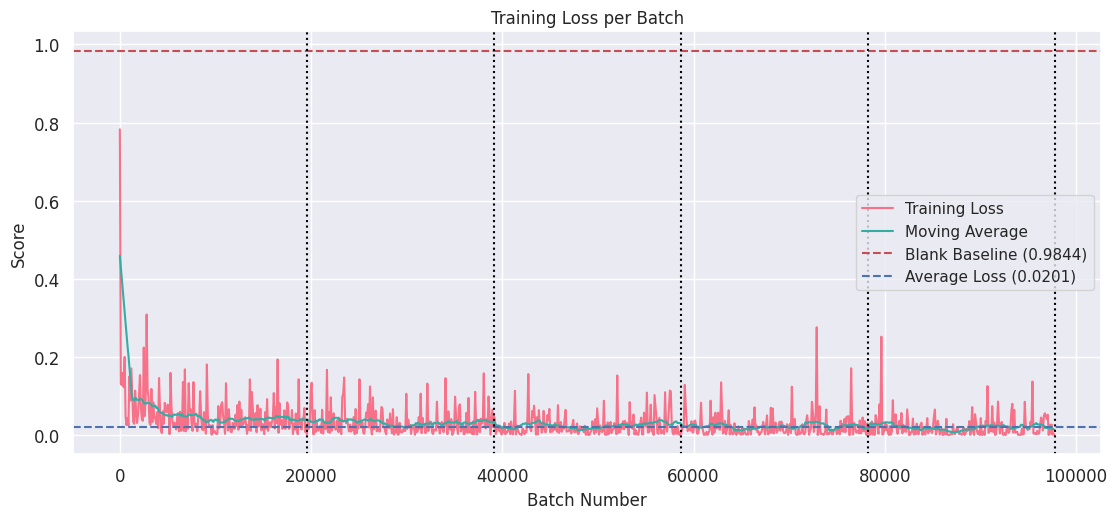

In [4]:
json_path = '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Topic-6/lightning_logs/version_0/checkpoints/train_metrics.json'
with open(json_path, 'r') as f:
    data = json.load(f)
plot_training_loss(data['loss'], data["epoch_batch_count"], "Loss", baseline=0.9844, average=True)

In [ ]:
# metric_sub_data = {
#     "Recall": data["recall"],
#     "Precision": data["precision"],
#     "F1": data["f1"],
# }

# classes = list(data["auc"][0]['class_auc'].keys())
# auc_sub_data = {
#     c: [(d['batch_idx'], d['class_auc'][c]) for d in data["auc"]] for c in classes
# }
# auc_data = [(d['batch_idx'], d['mean_auc']) for d in data['auc']]


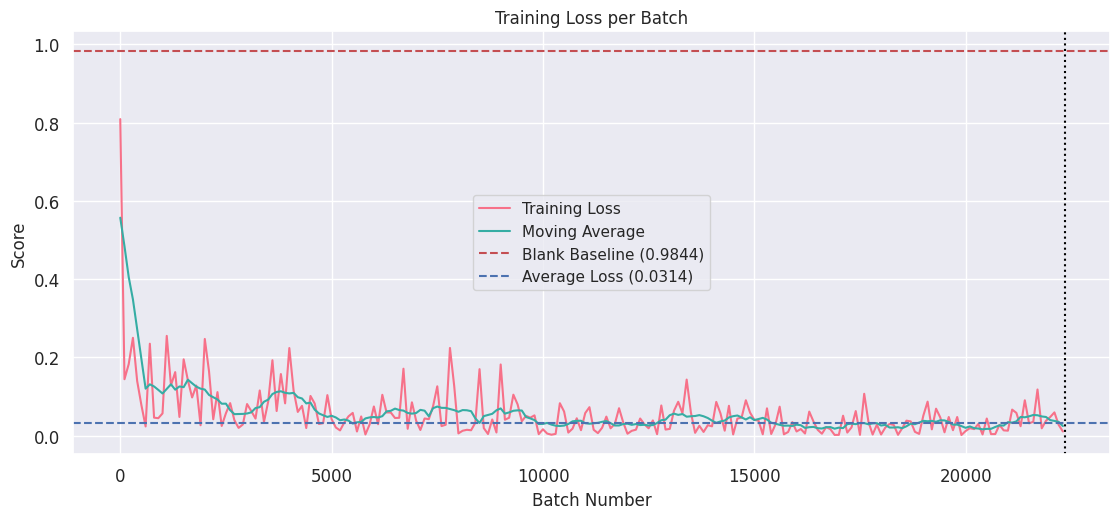

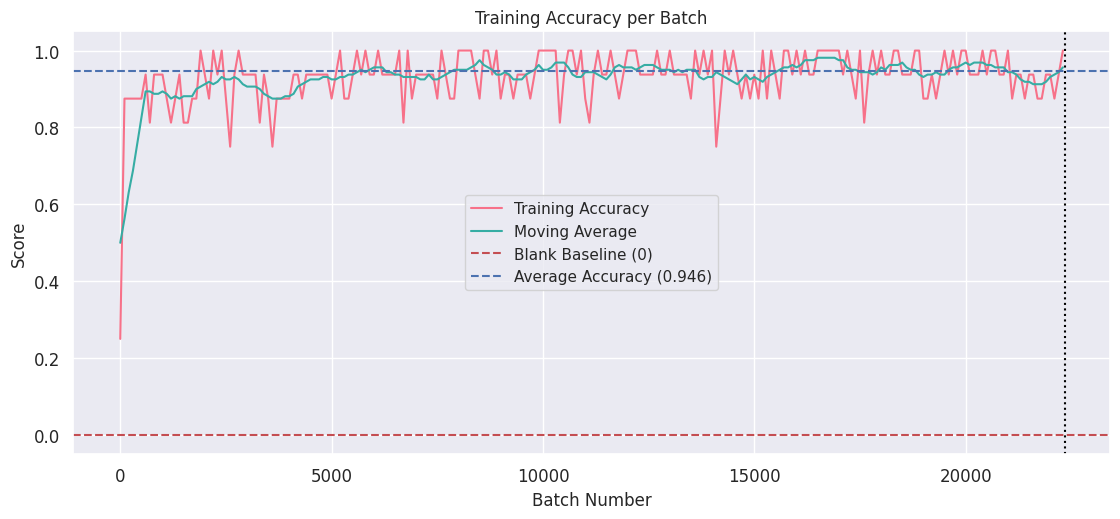

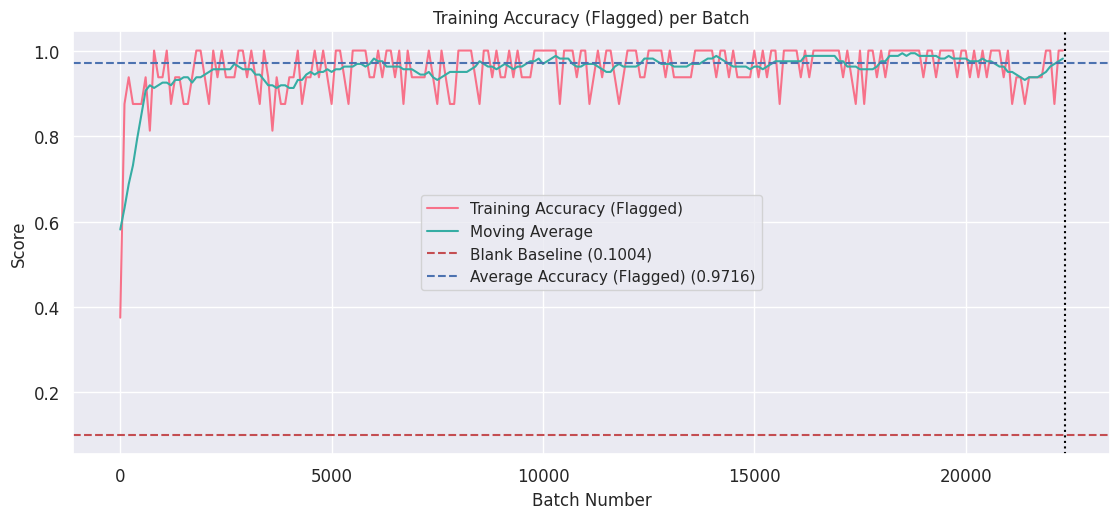

In [15]:
plot_training_loss(data['loss'], data["epoch_batch_count"], "Loss", baseline=0.9844, average=True)
plot_training_loss(data['acc'], data["epoch_batch_count"], "Accuracy", baseline=0, average=True)
plot_training_loss(data['acc_flag'], data["epoch_batch_count"], "Accuracy (Flagged)", baseline=0.1004, average=True)

In [6]:
# plot_val_loss(metric_sub_data, data['epoch_batch_count'], "Metrics")
# plot_val_loss(auc_sub_data, data['epoch_batch_count'], "ROC-AUC")
# plot_val_loss({"ROC-AUC": auc_data}, data['epoch_batch_count'], "ROC-AUC")

In [7]:
json_path = '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Clean/lightning_logs/agb-1/checkpoints/val_metrics.json'
with open(json_path, 'r') as f:
    data = json.load(f)

In [ ]:
plot_training_loss(data['loss'], data["epoch_batch_count"], "Loss", type="Validation", tick_interval=10, average=True)
plot_training_loss(data['acc'], data["epoch_batch_count"], "Accuracy", type="Validation", tick_interval=10, average=True)
plot_training_loss(data['acc_flag'], data["epoch_batch_count"], "Accuracy (Flagged)", type="Validation", tick_interval=10, average=True)